# Exploratory Data Analysis

## Task 1 - Understanding our dataset

### Importing required libraries

In [23]:
import os
import pandas as pd
import numpy as np
import hashlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

### How many images are there?

In [10]:
# Define your list of files
df_filename_list = ['test.txt', 'val.txt', 'train.txt']

# Initializing Dataframe dictionary
df_dict = {}

# 1. Get the path to the 'raw_data' folder dynamically
raw_data_path = os.path.join('..', 'raw_data')

for file in df_filename_list:
    # 2. Join the folder path with the specific filename
    full_file_path = os.path.join(raw_data_path, file)

    # Check if file exists to avoid crashing
    if os.path.exists(full_file_path):
        root, ext = os.path.splitext(file)
        # Read the csv
        df = pd.read_csv(full_file_path, sep=' ', header=None)

        # Rename columns
        df.columns = ['patient_id', 'filename', 'label', 'source']

        print(full_file_path)
        print(f"Total images in {file.upper()}: {len(df)}")
        print(f'--- {file.upper()} SOURCES ---')
        print(df['source'].value_counts())
    else:
        print(f"❌ Could not find file: {full_file_path}")

    # Add Dataframe to dictionary
    df_dict[root] = df

../raw_data/test.txt
Total images in TEST.TXT: 8482
--- TEST.TXT SOURCES ---
source
bimcv     8082
ricord     200
rsna       200
Name: count, dtype: int64
../raw_data/val.txt
Total images in VAL.TXT: 8473
--- VAL.TXT SOURCES ---
source
rsna          3869
bimcv         3408
stonybrook     940
cohen           96
sirm            65
ricord          62
actmed          31
fig1             2
Name: count, dtype: int64
../raw_data/train.txt
Total images in TRAIN.TXT: 67863
--- TRAIN.TXT SOURCES ---
source
bimcv         43142
stonybrook    12696
rsna           9719
sirm            878
ricord          834
cohen           471
actmed          101
fig1             22
Name: count, dtype: int64


### What is the average file size?

In [11]:
# Define your list of files
df_folder_list = ['test', 'val', 'train']

# 1. Get the path to the 'raw_data' folder dynamically
raw_data_path = os.path.join('..', 'raw_data')

for folder in df_folder_list:
    # 2. Join the folder path with the specific folder
    full_folder_path = os.path.join(raw_data_path, folder)

    # Check if folder exists to avoid crashing
    if os.path.exists(full_folder_path):
        all_files = os.listdir(full_folder_path)
        unique_extensions = set()
        for file in all_files:
            # Check for all unique extensions inside the folder
            root, ext = os.path.splitext(file)
            unique_extensions.add(ext)

        print(f"The unique extensions in {folder.upper()} are: {unique_extensions}")
    else:
        print(f"❌ Could not find folder: {full_folder_path}")

The unique extensions in TEST are: {'.Identifier', '.png'}
The unique extensions in VAL are: {'.jpg', '.jpeg', '.PNG', '.png', '.Identifier'}
The unique extensions in TRAIN are: {'.jpg', '.JPG', '.jpeg', '.png', '.Identifier'}


In [12]:
# Initializing a dictionary to plot file size distribution later
files_data = {}

for folder in df_folder_list:
    # Join the folder path with the specific folder
    full_folder_path = os.path.join(raw_data_path, folder)

    # Check if folder exists to avoid crashing
    file_sizes = []
    if os.path.exists(full_folder_path):
        all_files = os.listdir(full_folder_path)

        for file in all_files:
            # Retrieving file extension
            root, ext = os.path.splitext(file)

            if ext != '.Identifier':
                full_file_path = os.path.join(full_folder_path, file)
                file_sizes.append(os.path.getsize(full_file_path) / 1024)

        avg_size_kb = sum(file_sizes) / len(file_sizes)
        max_size_kb = max(file_sizes)
        min_size_kb = min(file_sizes)

        print(f"The average size in {folder.upper()} folder is: {avg_size_kb:.2f} KB")
        print(f"The maximum size in {folder.upper()} folder is: {max_size_kb:.2f} KB")
        print(f"The minimum size in {folder.upper()} folder is: {min_size_kb:.2f} KB")
    else:
        print(f"❌ Could not find folder: {full_folder_path}")

    # Updating dictionary
    files_data[folder] = file_sizes


The average size in TEST folder is: 427.55 KB
The maximum size in TEST folder is: 690.02 KB
The minimum size in TEST folder is: 147.05 KB
The average size in VAL folder is: 371.31 KB
The maximum size in VAL folder is: 1779.71 KB
The minimum size in VAL folder is: 13.90 KB
The average size in TRAIN folder is: 348.60 KB
The maximum size in TRAIN folder is: 2063.01 KB
The minimum size in TRAIN folder is: 9.59 KB


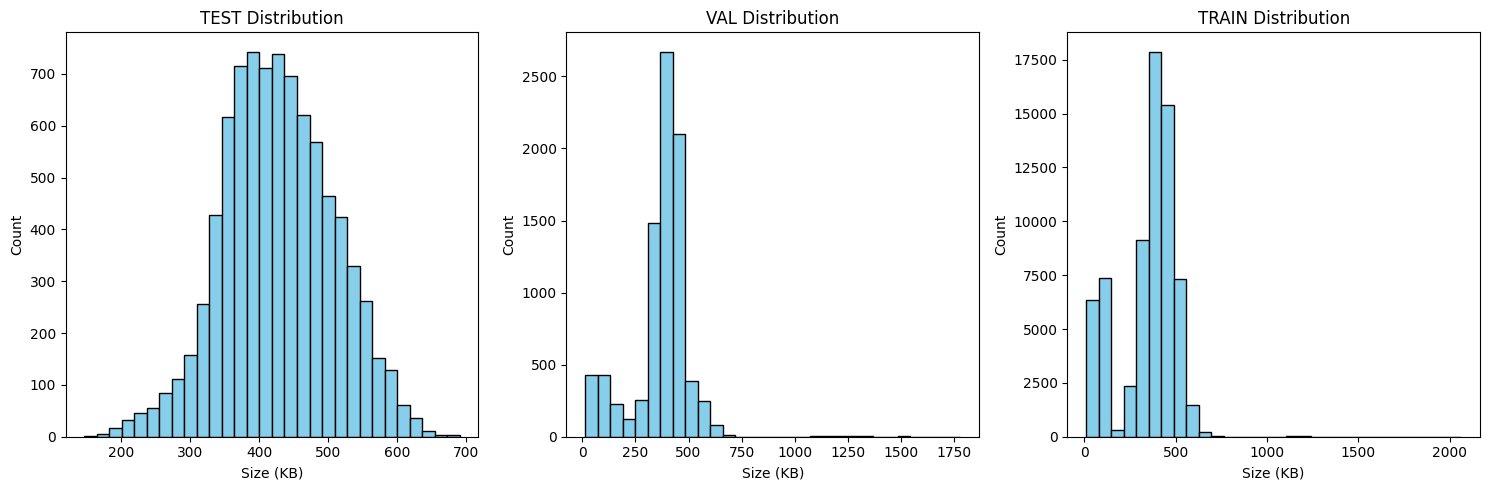

In [13]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through the folders and assign each to a subplot
for i, folder in enumerate(df_folder_list):
    # 1. Get the data
    sizes_kb = files_data[folder]

    # 2. Plot histogram on the specific axis (axes[i])
    axes[i].hist(sizes_kb, bins=30, color='skyblue', edgecolor='black')

    # 3. Add labels
    axes[i].set_title(f'{folder.upper()} Distribution')
    axes[i].set_xlabel('Size (KB)')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Checking random images

In [14]:
for k, v in df_dict.items():
    print(f'====={k.upper()} LABELS======')
    print(v['label'].value_counts())

=====TEST LABELS======
label
positive    4241
negative    4241
Name: count, dtype: int64
=====VAL LABELS======
label
positive    4241
negative    4232
Name: count, dtype: int64
=====TRAIN LABELS======
label
positive    57199
negative    10664
Name: count, dtype: int64


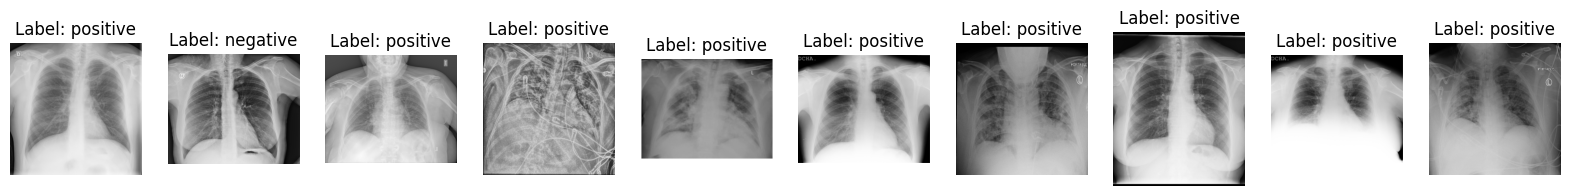

In [ ]:
def view_random_images(df, folder_name, n=10):
    # 1. Sample random rows
    random_rows = df.sample(n)

    # Set up the plotting figure
    plt.figure(figsize=(20, 5))

    for i, (index, row) in enumerate(random_rows.iterrows()):
        # 2. Build the path (adjusting for your 'raw_data' structure)
        # We need to go: raw_data -> folder (e.g., 'train') -> filename
        image_path = os.path.join(raw_data_path, folder_name, row['filename'])

        # 3. Load and display
        try:
            img = mpimg.imread(image_path)
            ax = plt.subplot(1, n, i + 1)
            ax.imshow(img, cmap='gray')
            ax.set_title(f"Label: {row['label']}")
            plt.axis('off') # Turn off the axis numbers for a cleaner look
        except Exception as e:
            print(f"Could not load {row['filename']}: {e}")

    plt.show()

# Call the function using your train dataframe
view_random_images(df_dict['train'], 'train')

### Checking for pixel brightness

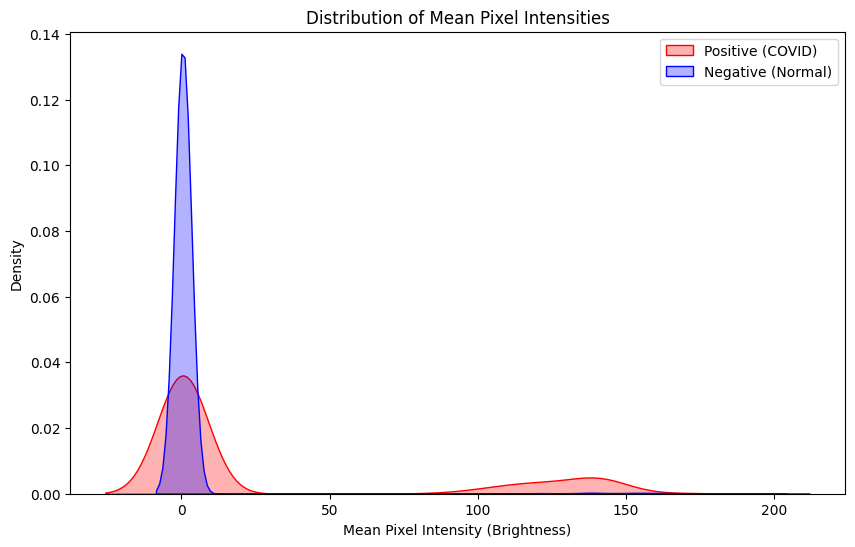

In [ ]:
# 1. Sample data to speed things up
sample_size = 10000
train_df = df_dict['train']
pos_df = train_df[train_df['label'] == 'positive'].sample(sample_size, random_state=42)
neg_df = train_df[train_df['label'] == 'negative'].sample(sample_size, random_state=42)

# 2. Calculate mean intensities
pos_intensities = []
neg_intensities = []

# Helper function to process a batch
def get_intensities(df, folder):
    intensities = []
    for filename in df['filename']:
        try:
            path = os.path.join(raw_data_path, folder, filename)
            img = mpimg.imread(path)
            # Calculate mean pixel value using your answer:
            mean_val = np.mean(img)
            intensities.append(mean_val)
        except:
            continue
    return intensities

pos_intensities = get_intensities(pos_df, 'train')
neg_intensities = get_intensities(neg_df, 'train')

# 3. Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(pos_intensities, label='Positive (COVID)', fill=True, color='red', alpha=0.3)
sns.kdeplot(neg_intensities, label='Negative (Normal)', fill=True, color='blue', alpha=0.3)
plt.title('Distribution of Mean Pixel Intensities')
plt.xlabel('Mean Pixel Intensity (Brightness)')
plt.legend()
plt.show()

### Checking for duplicates

In [ ]:
def get_file_hash(filepath):
    # Creating a hash object
    hash_obj = hashlib.md5()

    try:
        with open(filepath, 'rb') as file:
            binary_data = file.read()
            hash_obj.update(binary_data)
    except FileNotFoundError:
         print("Error: File not found!")

    return hash_obj.hexdigest()

In [ ]:
# Loop through each folder in your dictionary
for folder_name, df in df_dict.items():

    # 1. Define the specific folder path (e.g. ../raw_data/train)
    folder_path = os.path.join(raw_data_path, folder_name)

    print(f"Calculating hashes for {folder_name}...")

    # 2. Create a new column 'hash'
    # We use lambda to join the folder_path with the filename before hashing
    df['hash'] = df['filename'].apply(lambda x: get_file_hash(os.path.join(folder_path, x)))

Calculating hashes for test...
Calculating hashes for val...
Calculating hashes for train...


In [27]:
test_df = df_dict['test']
train_df = df_dict['train']

# Check if test hashes are in the train set
duplicates = test_df[test_df['hash'].isin(train_df['hash'])]

print(len(duplicates))
print(duplicates)

1
     patient_id                                           filename     label  \
3638     S09426  sub-S09426_ses-E22292_run-1_bp-chest_vp-ap_dx-...  positive   

     source                              hash  
3638  bimcv  c0a2799e230ddf02b7d175da70de07e5  


In [34]:
print(train_df[train_df['hash'] == duplicates.iloc[0]['hash']])

      patient_id                                           filename     label  \
27023     S10965  sub-S10965_ses-E22246_run-2_bp-chest_vp-ap_dx-...  positive   

      source                              hash  
27023  bimcv  c0a2799e230ddf02b7d175da70de07e5  


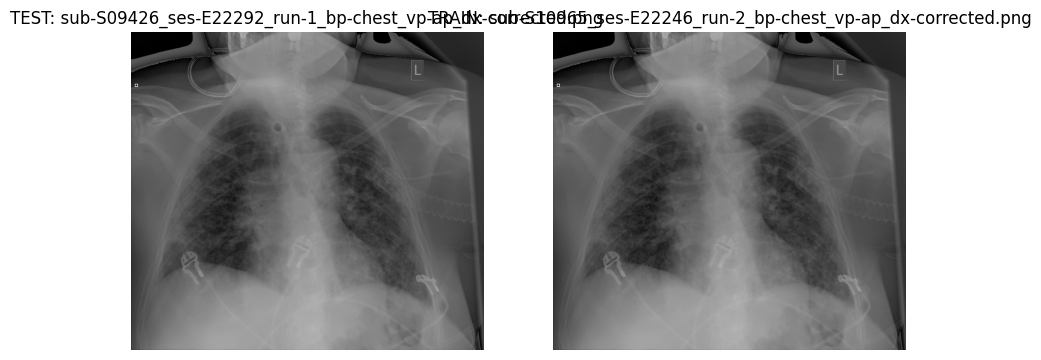

In [35]:
# 1. Get the hash of the duplicate (assuming there's just one for now)
dup_hash = duplicates.iloc[0]['hash']

# 2. Get the rows
test_row = test_df[test_df['hash'] == dup_hash].iloc[0]
train_row = train_df[train_df['hash'] == dup_hash].iloc[0]

# 3. Build full paths
test_path = os.path.join(raw_data_path, 'test', test_row['filename'])
train_path = os.path.join(raw_data_path, 'train', train_row['filename'])

# 4. Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Test Image
img_test = mpimg.imread(test_path)
axes[0].imshow(img_test, cmap='gray')
axes[0].set_title(f"TEST: {test_row['filename']}")
axes[0].axis('off')

# Train Image
img_train = mpimg.imread(train_path)
axes[1].imshow(img_train, cmap='gray')
axes[1].set_title(f"TRAIN: {train_row['filename']}")
axes[1].axis('off')

plt.show()